# Training Classfier for IT Consulting using Logistic Regression

## Input:  tsv formatted file with at least two classes 0/1.  Here's an example

In [8]:
# Combine two files, 0 and 1 classes into one for training the classifier

# Assuming input files have columns:
# url, end_url, word_count, visible_text
# And we want output files with 
# url, class, visible_text
#
filenames = [
    ('data/170915_manual_no_suppress_noforext_content_evaluate_lang_filtered_visible.tsv', 0),
    ('data/170915_manual_staffing_noforext_content_evaluate_lang_filtered_visible.tsv', 1)
]
target_file = 'data/170915_manual_staffing_training_data_{}_{}.tsv'.format(
    filenames[0][1], filenames[1][1])


with open(target_file, 'w') as outfile:
    for tup_fname in filenames:
        with open(tup_fname[0]) as infile:
            for line in infile:
                url, end_url, word_count, visible_text = line.split('\t')
                outfile.write("{}\t{}\t{}\n".format(url.strip(), tup_fname[1], visible_text.strip()))

print "DONE! File written to {}".format(target_file)


DONE! File written to data/170915_manual_staffing_training_data_0_1.tsv


In [9]:
# View sample data
import pandas as pd
data = pd.read_csv(target_file, delimiter='\t', header=None, encoding='utf-8')
print len(data), "lines found in output file {}".format(target_file)
data.loc[data[1] == 1]
data.head()

4242 lines found in output file data/170915_manual_staffing_training_data_0_1.tsv


,0,1,2
0,url,0,validate_url: no response
1,16500.com,0,home 16500 line card manufacturers quick link ...
2,1800contacts.com,0,contact lenses at 1-800 contacts world's large...
3,303taxi.com,0,"taxi cab service chicago suburbs, ohare and mi..."
4,320westsanantonio.com,0,a php error was encountered severity: notice m...


Opening data/170915_manual_staffing_training_data_0_1.tsv for data and loading X,Y classes

Count of classes loaded:
HERE!_> <type 'numpy.ndarray'>
Training Model ...
Start an iteration
Creating classifier from clf_factory()
Using LogisticRegression classifier
Fitting model to X, y training data, this may take a while...
DONE training, saving model.
Model is saved!
precision: [ 0.42769857  0.42711519  0.42755102  0.42798774  0.42842536  0.42886387
  0.42930328  0.42974359  0.4301848   0.43062693  0.43106996  0.4315139
  0.43195876  0.43240454  0.43285124  0.43329886  0.43374741  0.43316062
  0.43360996  0.43406023  0.43451143  0.43496358  0.43541667  0.4358707
  0.43632568  0.43678161  0.43723849  0.43769634  0.43815514  0.4386149
  0.43907563  0.43953733  0.44        0.44046365  0.44092827  0.44139388
  0.44186047  0.44232804  0.44279661  0.44326617  0.44373673  0.44420829
  0.44468085  0.44515442  0.445629    0.44610459  0.4465812   0.44705882
  0.44753747  0.44801715  0.44849785  0.

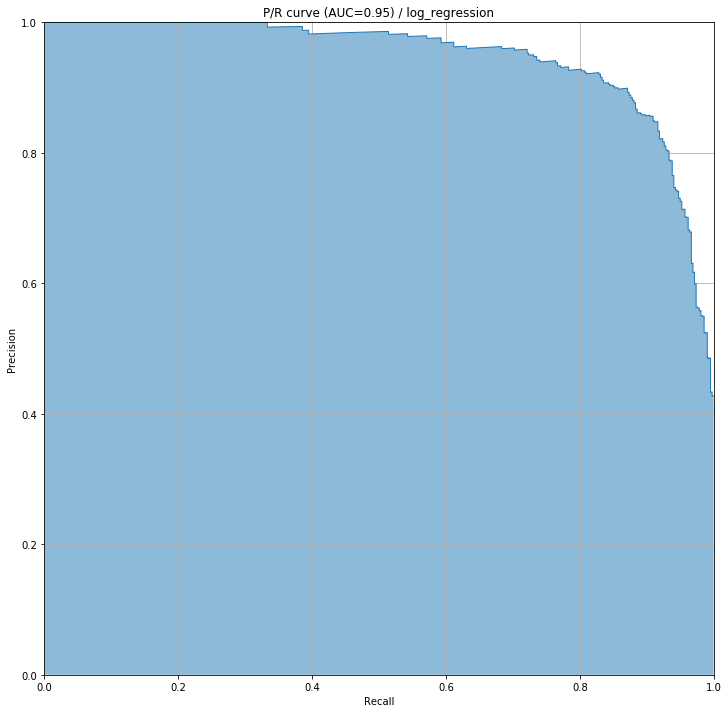

Mean: 0.894	STD: 0.000	MEAN_SCORES	0.946	STD_SCORES:	0.000	
0.0584905660377 0.105560791706
CPU times: user 57.4 s, sys: 1.31 s, total: 58.8 s
Wall time: 58.8 s


In [10]:
%%time
%matplotlib inline
import pandas as pd
import os
import numpy as np
import time

import classification.train_classifier as bc
import classification.utils as utils

## ***** INPUTS ***** 
data_source_file = target_file
class_type = "log_regression" # svm bayes log_regression
base_file = os.path.basename(target_file).replace('.tsv', '')
save_path = "data/model_{}_{}".format(class_type, base_file)
## **** END INPUTS ****


models = {
    'svm': bc.create_svm_model,
    'bayes': bc.create_ngram_model,
    'log_regression': bc.create_lg_model
}

for class_type in ["log_regression"]: #,"bayes","svm"]:
    classifier = models[class_type] 

    print "Opening {} for data and loading X,Y classes".format(data_source_file)
    data = pd.read_csv(data_source_file, delimiter='\t', encoding='utf-8')

    X_orig = data.iloc[:, 2].values
    Y_orig = data.iloc[:, 1].values

    print "\nCount of classes loaded:"
    classes = np.unique(Y_orig)

    pos_neg = np.logical_or(Y_orig == 1, Y_orig == 0)
    X = X_orig[pos_neg]
    Y = Y_orig[pos_neg]

    Y = utils.tweak_labels(Y, [1])

    print "Training Model ..."
    bc.train_model(classifier, X, Y, save_path, class_type, plot=True);
